Exploring The Data


In [463]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Mount Drive

In [464]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading Dataset


In [465]:
dataset =  pd.read_csv('/content/drive/My Drive/train.tsv', sep='\t')
dataset = dataset.dropna()
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [466]:
dataset.shape

(156060, 4)

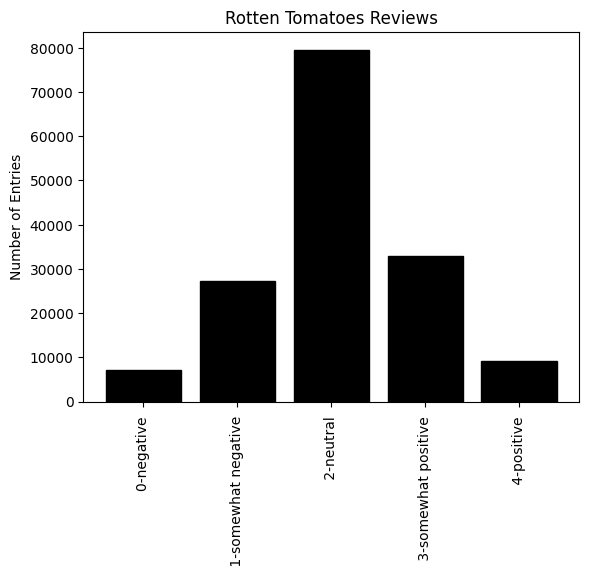

In [467]:
c = dict(dataset.Sentiment.value_counts())
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand

objects = ('0-negative ', ' 1-somewhat negative ', ' 2-neutral ', ' 3-somewhat positive ', ' 4-positive ')
y_pos = np.arange(len(objects))
performance = [c[0],c[1],c[2],c[3],c[4]]

barlist = plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Number of Entries')
plt.title('Rotten Tomatoes Reviews')
barlist[0].set_color('#000000')
barlist[1].set_color('#000000')
barlist[2].set_color('#000000')
barlist[3].set_color('#000000')
barlist[4].set_color('#000000')

plt.show()



Adjustable Parameters

In [0]:
remove_fPunct = True
fTokenizaton = True
fStopwords = True
fStemming = False
fLemmatization = True


Data Cleaning | Punctuations

In [469]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [0]:
def remove_punctuation(text):
  txt_nonpunct = "".join([a for a in text if a not in string.punctuation])
  return txt_nonpunct 

In [0]:
if remove_fPunct:
  dataset['Phrase'] = dataset['Phrase'].apply(lambda x: remove_punctuation(x)) 

Data Cleaning | Tokenization

In [0]:
import re

def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens 

if fTokenizaton:
  dataset['Phrase'] = dataset['Phrase'].apply(lambda x: tokenize(x.lower()))

Data Cleaning | Stop Words

In [473]:
import nltk 
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [0]:
def remove_stopwords(txt_tokenized):
  txt_clean = [word for word in txt_tokenized if word not in stopwords]
  return txt_clean

if fStopwords:
  dataset['Phrase'] = dataset['Phrase'].apply(lambda x: remove_stopwords(x))

Data Cleaning | Stemming

In [0]:

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [0]:
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

In [0]:
if fStemming:
  dataset['Phrase'] = dataset['Phrase'].apply(lambda x: stemming(x))

Data Cleaning | Lemmatization

In [0]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

def lemmatization(token_txt):
  text = [wn.lemmatize(word) for word in token_txt]
  return text


In [0]:
if fLemmatization:
  dataset['Phrase'] = dataset['Phrase'].apply(lambda x: lemmatization(x))

In [480]:
dataset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"[series, escapade, demonstrating, adage, good,...",1
1,2,1,"[series, escapade, demonstrating, adage, good,...",2
2,3,1,[series],2
3,4,1,[],2
4,5,1,[series],2


Splitting The Dataset

In [481]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset['Phrase'], dataset['Sentiment'], test_size=0.3, random_state=2003)
documents = []
X_train = np.array(X_train.values.tolist())
Y_train = np.array(Y_train.values.tolist())
for i in range(len(X_train)):
  documents.append([list(X_train[i]), Y_train[i]]) 

X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())
for i in range(len(X_test)):
  documents.append([list(X_test[i]), Y_test[i]]) 

print(documents[0][0])
dataset = pd.DataFrame(documents, columns=['text', 'sentiment']) 
dataset['join'] = dataset.text.apply(' '.join)
dataset.head()

['age']


,text,sentiment,join
0,[age],2,age
1,"[gorgeous, epic]",4,gorgeous epic
2,"[fan, grossout, comedy]",2,fan grossout comedy
3,"[filmmaker, ascends, literally, olympus, art, ...",4,filmmaker ascends literally olympus art world
4,"[twisting, mystery]",2,twisting mystery


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset['join'],  dataset['sentiment'], test_size=0.3, random_state=2003)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 2500)
X = vectorizer.fit_transform(dataset["join"])
Y = dataset['sentiment']


X_train = vectorizer.transform(X_train).toarray()
Y_train = Y_train 
X_test = vectorizer.transform(X_test).toarray()
Y_test = Y_test



In [484]:
Y_test

13510     2
61932     0
82549     1
137718    3
121990    2
         ..
94224     2
135456    2
154729    1
23031     1
57870     2
Name: sentiment, Length: 46818, dtype: int64

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy

In [486]:
X_train.shape

(109242, 2500)

In [487]:
batch_size = 64
num_classes = 5
epochs = 20
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
Y_test

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [488]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1,
                  activation='relu',
                  input_shape=(2500,1)))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(rate = 0.1))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_55 (Conv1D)           (None, 2500, 64)          128       
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 2500, 64)          4160      
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 2500, 32)          2080      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 2500, 32)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 2500, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 80000)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)              

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy',f1_m,precision_m,recall_m])

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [492]:
history = model.fit(X_train, Y_train,
          batch_size=64,
          epochs=20)

Epoch 1/20
109242/109242 [==============================] - 28s 258us/step - loss: 1.1014 - acc: 0.5725 - f1_m: 0.5007 - precision_m: 0.6125 - recall_m: 0.4290
Epoch 2/20
109242/109242 [==============================] - 26s 242us/step - loss: 0.9852 - acc: 0.6184 - f1_m: 0.5855 - precision_m: 0.6715 - recall_m: 0.5203
Epoch 3/20
109242/109242 [==============================] - 26s 242us/step - loss: 0.9505 - acc: 0.6352 - f1_m: 0.6050 - precision_m: 0.6830 - recall_m: 0.5442
Epoch 4/20
109242/109242 [==============================] - 27s 245us/step - loss: 0.9284 - acc: 0.6460 - f1_m: 0.6189 - precision_m: 0.6896 - recall_m: 0.5624
Epoch 5/20
109242/109242 [==============================] - 27s 245us/step - loss: 0.9125 - acc: 0.6518 - f1_m: 0.6288 - precision_m: 0.6941 - recall_m: 0.5757
Epoch 6/20
109242/109242 [==============================] - 27s 245us/step - loss: 0.8970 - acc: 0.6600 - f1_m: 0.6394 - precision_m: 0.6986 - recall_m: 0.5904
Epoch 7/20
109242/109242 [==============

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m'])


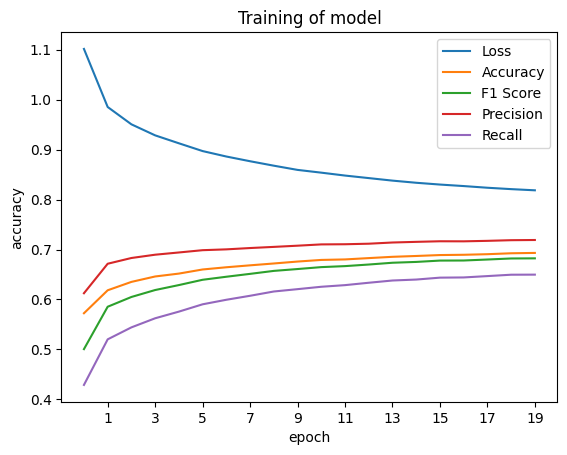

In [493]:
print(history.history.keys())
plt.xticks([1,3,5,7,9,11,13,15,17,19,20])
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['f1_m'])
plt.plot(history.history['precision_m'])
plt.plot(history.history['recall_m'])
plt.title('Training of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Loss', 'Accuracy','F1 Score','Precision','Recall'], loc='upper right')
plt.show()

In [0]:
model.save('1104361_1dconv_reg.h5')

In [0]:
import keras
model.save('1104361_1dconv_reg.h5')

# Recreate the exact same model purely from the file
model = load_model('1104361_1dconv_reg.h5', 
                   custom_objects = {'f1_m': f1_m,  'precision_m': precision_m, 'recall_m' : recall_m})

In [496]:
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('F1 Score:', score[2])
print('Precision:', score[3])
print('Recall:', score[4])


Test loss: 0.9958740427216103
Test accuracy: 0.6378102439360085
F1 Score: 0.6214846309075989
Precision: 0.6596687935546389
Recall: 0.5880003417641774
